# XRP

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sbn
from sklearn.model_selection import train_test_split

ds = pd.read_csv('dataset/XRP_2017_0925_2021_0108.csv', names=['INDEX','ENDMONEY','LASTDAY_PLUS_MONEY', 'TOTAL_MONEY', 'UPDOWNFLAG'])

print(ds.head())
print(ds.info())
print(ds.describe())

   INDEX  ENDMONEY  LASTDAY_PLUS_MONEY  TOTAL_MONEY  UPDOWNFLAG
0      1       203                   0            0           0
1      2       211                   8            0           1
2      3       232                  21            0           1
3      4       222                  10            0           0
4      5       220                   2            0           0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   INDEX               1198 non-null   int64
 1   ENDMONEY            1198 non-null   int64
 2   LASTDAY_PLUS_MONEY  1198 non-null   int64
 3   TOTAL_MONEY         1198 non-null   int64
 4   UPDOWNFLAG          1198 non-null   int64
dtypes: int64(5)
memory usage: 46.9 KB
None
             INDEX     ENDMONEY  LASTDAY_PLUS_MONEY   TOTAL_MONEY   UPDOWNFLAG
count  1198.000000  1198.000000         1198.000000  1.198

<AxesSubplot:>

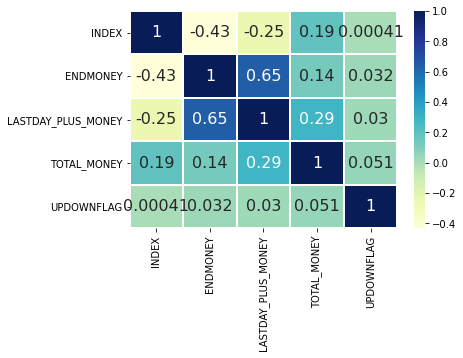

In [7]:
sbn.heatmap(ds.corr(), linewidths='1', cmap="YlGnBu", annot=True, annot_kws={"size": 16})

In [8]:
# sbn.pairplot(ds, hue='WIN')


# grid = sbn.FacetGrid(ds, col='LASTDAY_PLUS_MONEY')
# grid.map(pl.hist, 'WIN', bins=10)
# pl.show()
seed = 0;
np.random.seed(seed)
tf.random.set_seed(3)

datavalues = ds.values
print("최대 총판매금액 : %d" %(np.max(datavalues[:,3:4])))
datavalues[:,3:4] = datavalues[:,3:4].astype('float64') / 3751620778
x = datavalues[:,0:4]
y = datavalues[:,4]


최대 총판매금액 : 3751620778


In [9]:
## 학습셋 테스트셋 구분
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=seed)

model= Sequential()
model.add(Dense(36, input_dim=4, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, batch_size=10)

model.save_weights('dataset/xrp_wight.h5')
print("Saved model to disk")

Train on 838 samples
Epoch 1/100
838/838 [==============================] - 1s 655us/sample - loss: 7.7405 - accuracy: 0.4618
Epoch 2/100
838/838 [==============================] - 0s 222us/sample - loss: 1.2139 - accuracy: 0.4857
Epoch 3/100
838/838 [==============================] - 0s 217us/sample - loss: 1.3257 - accuracy: 0.5573
Epoch 4/100
838/838 [==============================] - 0s 222us/sample - loss: 1.1967 - accuracy: 0.5119
Epoch 5/100
838/838 [==============================] - 0s 222us/sample - loss: 1.1949 - accuracy: 0.5084
Epoch 6/100
838/838 [==============================] - 0s 222us/sample - loss: 1.3692 - accuracy: 0.5095
Epoch 7/100
838/838 [==============================] - 0s 221us/sample - loss: 1.1266 - accuracy: 0.4773
Epoch 8/100
838/838 [==============================] - 0s 221us/sample - loss: 0.9753 - accuracy: 0.5418
Epoch 9/100
838/838 [==============================] - 0s 221us/sample - loss: 1.4320 - accuracy: 0.5107
Epoch 10/100
838/838 [============

838/838 [==============================] - 0s 220us/sample - loss: 1.0231 - accuracy: 0.4988
Epoch 79/100
838/838 [==============================] - 0s 223us/sample - loss: 1.0209 - accuracy: 0.4905
Epoch 80/100
838/838 [==============================] - 0s 224us/sample - loss: 0.9971 - accuracy: 0.5119
Epoch 81/100
838/838 [==============================] - 0s 224us/sample - loss: 0.9453 - accuracy: 0.5298
Epoch 82/100
838/838 [==============================] - 0s 220us/sample - loss: 1.0096 - accuracy: 0.5107
Epoch 83/100
838/838 [==============================] - 0s 223us/sample - loss: 1.0966 - accuracy: 0.5155
Epoch 84/100
838/838 [==============================] - 0s 223us/sample - loss: 1.0128 - accuracy: 0.5143
Epoch 85/100
838/838 [==============================] - 0s 227us/sample - loss: 0.9749 - accuracy: 0.5310
Epoch 86/100
838/838 [==============================] - 0s 223us/sample - loss: 0.9636 - accuracy: 0.5179
Epoch 87/100
838/838 [==============================] - 0s 

In [10]:
loss, Hit = model.evaluate(x_test, y_test, verbose=1)
print("\n Hit : %.2f%%, loss : %.2f%%"%(Hit * 100, loss * 100))

360/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


 Hit : 51.94%, loss : 92.38%
